# Importing Required Libraries and Setting Display Options

In [1]:
# Import necessary libraries
import re
import warnings
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS  # Generate wordclouds
from bs4 import BeautifulSoup  # Clean HTML text
from IPython.display import Markdown, display

# Custom function to display Markdown text
def printmd(string):
    display(Markdown(string))

# Ignore warnings for a cleaner output
warnings.filterwarnings('ignore')

# Pandas display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns in output
pd.set_option('display.max_colwidth', 60)   # Set column width to 60 for better viewing
# Alternative: pd.set_option("display.max_colwidth", None) # Show full content without truncation

# Enable Plotly offline mode
init_notebook_mode(connected=True)

# Enable inline plotting for Matplotlib in Jupyter Notebook
%matplotlib inline


# Loading and Exploring the Medicine Dataset

In [3]:
# Load the dataset
df_med = pd.read_csv('medicine.csv')

# Display the first few rows of the dataset
printmd("### Preview of the Medicine Dataset")
df_med.head()




### Preview of the Medicine Dataset

,brand id,brand name,type,slug,dosage form,generic,strength,manufacturer,package container,Package Size
0,4077,A-Cold,allopathic,a-coldsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 40.12,NaN
1,4006,A-Cof,allopathic,a-cofsyrup10-mg30-mg125-mg5-ml,Syrup,Dextromethorphan + Pseudoephedrine + Triprolidine,(10 mg+30 mg+1.25 mg)/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 100.00,NaN
2,6174,A-Clox,allopathic,a-cloxinjection500-mgvial,Injection,Cloxacillin Sodium,500 mg/vial,ACME Laboratories Ltd.,"500 mg vial: ৳ 28.43,(5's pack: ৳ 142.15),",(5's pack: ৳ 142.15)
3,6173,A-Clox,allopathic,a-cloxinjection250-mgvial,Injection,Cloxacillin Sodium,250 mg/vial,ACME Laboratories Ltd.,"250 mg vial: ৳ 20.00,(5's pack: ৳ 100.00),",(5's pack: ৳ 100.00)
4,6172,A-Clox,allopathic,a-cloxpowder-for-suspension125-mg5-ml,Powder for Suspension,Cloxacillin Sodium,125 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 45.00,NaN


In [4]:
# Display the shape of the dataset (rows, columns)
printmd(f"**Dataset Shape:** {df_med.shape}")



**Dataset Shape:** (21714, 10)

In [5]:
# Generate descriptive statistics (summary) for numerical columns
printmd("### Descriptive Statistics")
df_med.describe()



### Descriptive Statistics

,brand id
count,21714.000000
mean,16370.435019
std,10289.034379
min,1.000000
25%,7374.250000
50%,14587.500000
75%,27078.750000
max,33198.000000


In [6]:
# List all column names
printmd("### Column Names in the Dataset")
df_med.columns

### Column Names in the Dataset

Index(['brand id', 'brand name', 'type', 'slug', 'dosage form', 'generic',
       'strength', 'manufacturer', 'package container', 'Package Size'],
      dtype='object')

# Dropping Unnecessary Columns from the Dataset


In [7]:
# Dropping 'brand id' and 'slug' columns as they are not needed for the analysis
df_med.drop(["brand id", "slug"], axis=1, inplace=True)

# Confirm the columns have been dropped
printmd("### Updated Column Names After Dropping Unnecessary Columns")
df_med.columns


### Updated Column Names After Dropping Unnecessary Columns

Index(['brand name', 'type', 'dosage form', 'generic', 'strength',
       'manufacturer', 'package container', 'Package Size'],
      dtype='object')

# Descriptive Analysis

In [8]:
df_med.head()

,brand name,type,dosage form,generic,strength,manufacturer,package container,Package Size
0,A-Cold,allopathic,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 40.12,NaN
1,A-Cof,allopathic,Syrup,Dextromethorphan + Pseudoephedrine + Triprolidine,(10 mg+30 mg+1.25 mg)/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 100.00,NaN
2,A-Clox,allopathic,Injection,Cloxacillin Sodium,500 mg/vial,ACME Laboratories Ltd.,"500 mg vial: ৳ 28.43,(5's pack: ৳ 142.15),",(5's pack: ৳ 142.15)
3,A-Clox,allopathic,Injection,Cloxacillin Sodium,250 mg/vial,ACME Laboratories Ltd.,"250 mg vial: ৳ 20.00,(5's pack: ৳ 100.00),",(5's pack: ৳ 100.00)
4,A-Clox,allopathic,Powder for Suspension,Cloxacillin Sodium,125 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 45.00,NaN


In [10]:
# Display the dimensions of the dataset with a clear and formatted markdown output
printmd(f"### Medicine Dataset Dimensions")
printmd(f"~ **{df_med.shape[0]}** medicines, **{df_med.shape[1]}** columns")


### Medicine Dataset Dimensions

~ **21714** medicines, **8** columns

In [11]:
df_med.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21714 entries, 0 to 21713
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand name         21714 non-null  object
 1   type               21714 non-null  object
 2   dosage form        21714 non-null  object
 3   generic            21712 non-null  object
 4   strength           20865 non-null  object
 5   manufacturer       21714 non-null  object
 6   package container  21672 non-null  object
 7   Package Size       13935 non-null  object
dtypes: object(8)
memory usage: 1.3+ MB


# Checking for Duplicates in the Medicine Dataset

In [12]:
# Checking for duplicates in the dataset
known_observations = len(df_med.index)
unique_observations = len(df_med.drop_duplicates().index)

printmd(f"### Duplicate Check")
print(f"Known observations: {known_observations}")
print(f"Unique observations: {unique_observations}")

# If no duplicates found, display a message in markdown format
if known_observations == unique_observations:
    printmd("**No duplicates found!**")
else:
    printmd(f"**{known_observations - unique_observations} duplicates found!**")


### Duplicate Check

Known observations: 21714
Unique observations: 21708


**6 duplicates found!**

# Generating Descriptive Statistics for Categorical Columns

In [13]:
# Generate descriptive statistics for object-type (categorical) columns and transpose the result
printmd("### Descriptive Statistics for Categorical Columns")
df_med.describe(include=['object']).T


### Descriptive Statistics for Categorical Columns

,count,unique,top,freq
brand name,21714,13934,Renova,9
type,21714,2,allopathic,21363
dosage form,21714,112,Tablet,9329
generic,21712,1661,Cefixime Trihydrate,341
strength,20865,1033,500 mg,1298
manufacturer,21714,232,Incepta Pharmaceuticals Ltd.,1182
package container,21672,7364,"Unit Price: ৳ 10.00,(30's pack: ৳ 300.00),",505
Package Size,13935,3531,(30's pack: ৳ 300.00),509


# Analyzing and Visualizing Missing Values in the Dataset

In [15]:
def missing_value_describe(data):
    """
    Function to check and describe missing values in the dataset.
    It prints the count and percentage of missing values in each column,
    and generates a bar plot if there are missing values.
    """
    # Calculate total missing values and missing percentage
    total = data.isna().sum().sort_values(ascending=False)
    missing_value_pct_stats = (data.isnull().sum() / len(data) * 100)
    missing_value_col_count = sum(missing_value_pct_stats > 0)

    # Create a DataFrame for missing value statistics
    missing_data = pd.concat([total, missing_value_pct_stats], axis=1, keys=['Total', 'Percentage(%)'])

    # Print number of rows with missing values and columns containing missing values
    print(f"Number of rows with at least 1 missing value: {data.isna().any(axis=1).sum()}")
    print(f"Number of columns with missing values: {missing_value_col_count}")

    if missing_value_col_count != 0:
        # Display missing percentage in descending order
        print("\nMissing percentage (descending):")
        display(missing_data.head(missing_value_col_count))

        # Plot missing values as a bar chart
        missing = data.isnull().sum()
        missing = missing[missing > 0].sort_values()
        plt.figure(figsize=(10, 8))
        plt.title("Missing Values by Column", fontsize=14)
        plt.barh(missing.index, missing.values, color='skyblue')
        plt.xlabel('Count of Missing Values')
        plt.show()
    else:
        print("No missing data!!!")


Number of rows with at least 1 missing value: 8235
Number of columns with missing values: 4

Missing percentage (descending):


,Total,Percentage(%)
Package Size,7779,35.824813
strength,849,3.909920
package container,42,0.193424
generic,2,0.009211


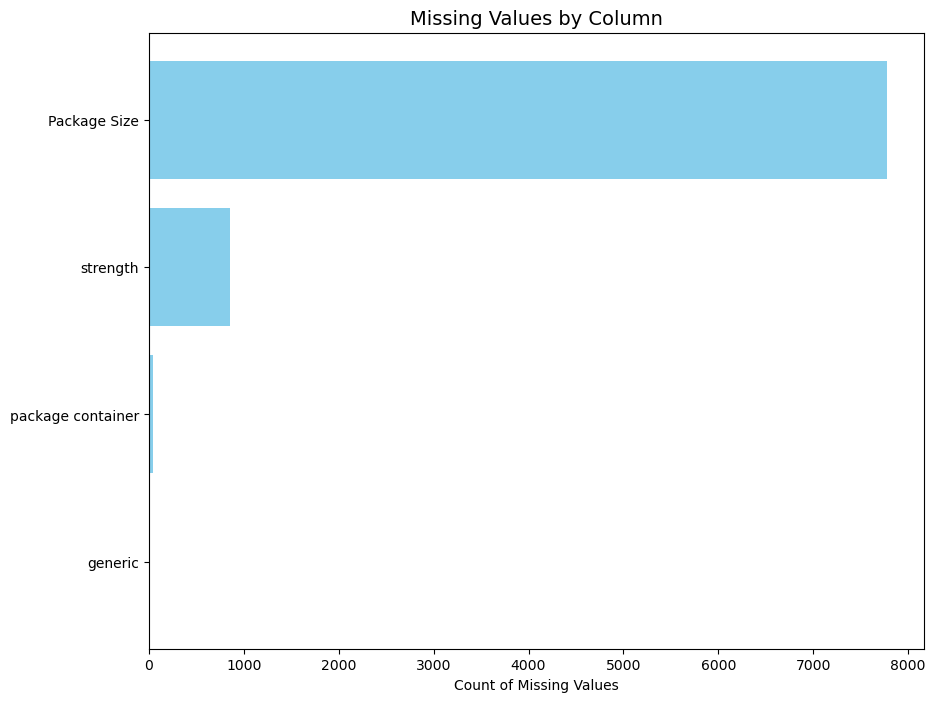

In [17]:
# Calling the function to analyze and visualize missing values in the dataset
missing_value_describe(df_med)


# Observation
Package Size column has the highest number of missing values (~36%), because around 30%+n

# Visualization

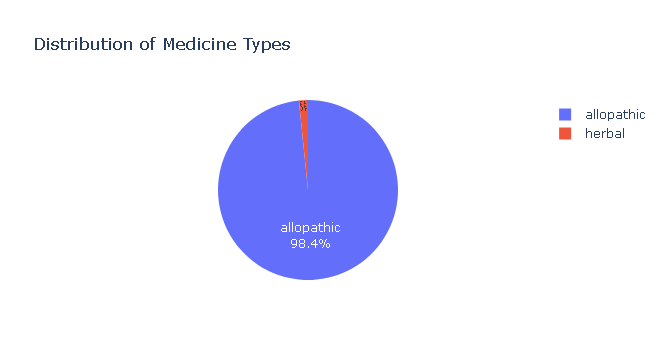

#### Significant Gap Between Allopathic and Herbal Medicines

In [19]:
import plotly.express as px

# Create a DataFrame for pie chart using value counts of medicine types
medicine_counts = df_med['type'].value_counts().reset_index()
medicine_counts.columns = ['Type', 'Count']  # Renaming columns for clarity

# Create a pie chart to visualize the distribution of medicine types
fig = px.pie(medicine_counts, values='Count', names='Type', title='Distribution of Medicine Types')

# Update pie chart traces for better text visibility
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the pie chart
fig.show()

# Print an observation regarding the distribution
printmd("#### Significant Gap Between Allopathic and Herbal Medicines")


In [20]:
import plotly.express as px

# Function to visualize the top entries of a specified column in the medicine dataset
def top_plot(col_name, rows):
    """
    Generates a bar plot for the top entries in the specified column of the medicine dataset.

    Parameters:
    col_name (str): The name of the column to visualize.
    rows (int): The number of top entries to display.

    Returns:
    None: Displays a bar plot of the top entries.
    """
    # Calculate counts and percentages
    value_counts = df_med[col_name].value_counts()
    value_counts_normalized = df_med[col_name].value_counts(normalize=True)

    # Combine counts and percentages into a DataFrame
    tdf = pd.DataFrame({
        col_name.title(): value_counts.index,
        'Counts': value_counts.values,
        'Percentage': value_counts_normalized.values
    }).head(rows)

    # Format counts with percentages
    tdf['Count (%)'] = tdf['Counts'].astype(str) + tdf['Percentage'].apply(lambda x: f' ({x:.2%})')

    # Create a bar plot
    fig = px.bar(
        tdf,
        x=tdf[col_name.title()],
        y='Counts',
        title=f'Top {col_name.title()}',
        text='Count (%)'
    )
    fig.update_layout(yaxis_title='Count')
    fig.update_traces(textposition='outside')  # Place text outside the bars for clarity

    # Show the plot
    fig.show()


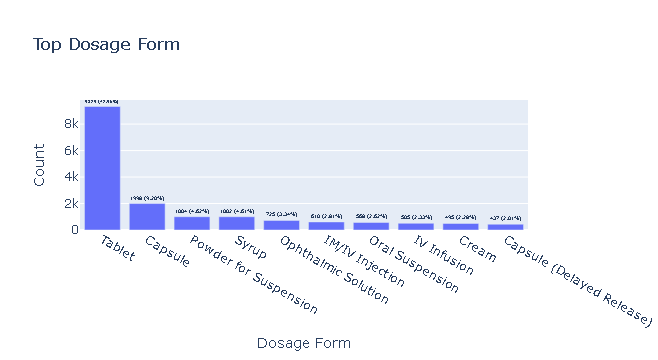

In [21]:
# Set the column name to visualize
col_name = 'dosage form'

# Generate the bar plot for the top 10 dosage forms
top_plot(col_name, 10)


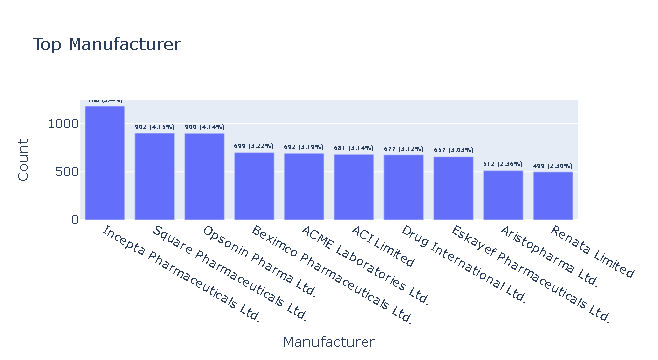

In [22]:
# Set the column name to visualize
col_name = 'manufacturer'

# Generate the bar plot for the top 10 manufacturers
top_plot(col_name, 10)


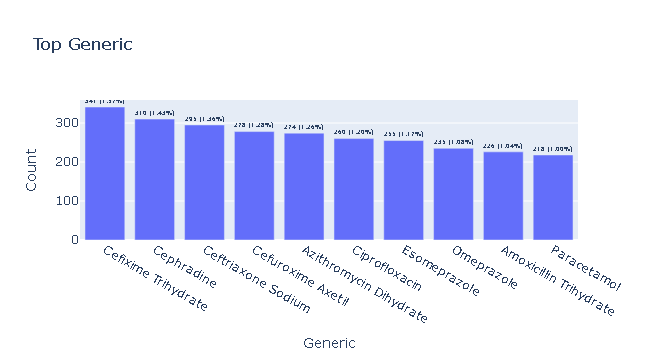

In [23]:
# Set the column name to visualize
col_name = 'generic'

# Generate the bar plot for the top 10 generic medicines
top_plot(col_name, 10)


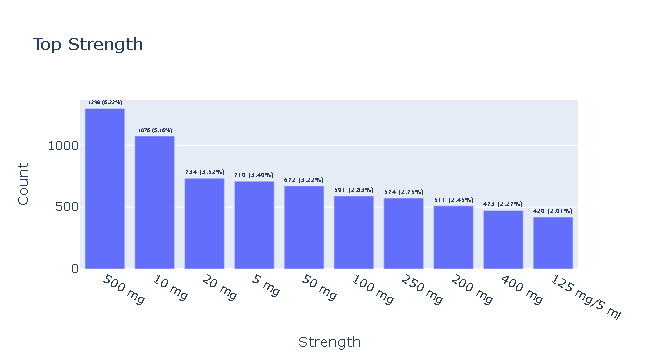

In [24]:
# Set the column name to visualize
col_name = 'strength'

# Generate the bar plot for the top 10 strengths
top_plot(col_name, 10)


In [25]:
# Display the first 25 rows of 'dosage form' and 'package container' columns
df_med[['dosage form', 'package container']].head(25)


,dosage form,package container
0,Syrup,100 ml bottle: ৳ 40.12
1,Syrup,100 ml bottle: ৳ 100.00
2,Injection,"500 mg vial: ৳ 28.43,(5's pack: ৳ 142.15),"
3,Injection,"250 mg vial: ৳ 20.00,(5's pack: ৳ 100.00),"
4,Powder for Suspension,100 ml bottle: ৳ 45.00
5,Capsule,"Unit Price: ৳ 5.98,(100's pack: ৳ 598.00),"
6,Tablet,"Unit Price: ৳ 2.50,(20's pack: ৳ 50.00),"
7,Tablet,"Unit Price: ৳ 1.43,(100's pack: ৳ 143.00),"
8,Tablet,"Unit Price: ৳ 6.00,(50's pack: ৳ 300.00),"
9,Tablet,"Unit Price: ৳ 7.50,(30's pack: ৳ 225.00),"


# Remove Null Rows from Package Size Column


In [26]:
# Remove the null rows from the 'Package Size' column
df_package_not_null = df_med.dropna(subset=['Package Size'])


In [27]:
# Display the first 8 rows of the DataFrame without null values in the 'Package Size' column
df_package_not_null.head(8)


,brand name,type,dosage form,generic,strength,manufacturer,package container,Package Size
2,A-Clox,allopathic,Injection,Cloxacillin Sodium,500 mg/vial,ACME Laboratories Ltd.,"500 mg vial: ৳ 28.43,(5's pack: ৳ 142.15),",(5's pack: ৳ 142.15)
3,A-Clox,allopathic,Injection,Cloxacillin Sodium,250 mg/vial,ACME Laboratories Ltd.,"250 mg vial: ৳ 20.00,(5's pack: ৳ 100.00),",(5's pack: ৳ 100.00)
5,A-Clox,allopathic,Capsule,Cloxacillin Sodium,500 mg,ACME Laboratories Ltd.,"Unit Price: ৳ 5.98,(100's pack: ৳ 598.00),",(100's pack: ৳ 598.00)
6,A-Care,allopathic,Tablet,Betacarotene + Vitamin C + Vitamin E,6 mg+200 mg+50 mg,Asiatic Laboratories Ltd.,"Unit Price: ৳ 2.50,(20's pack: ৳ 50.00),",(20's pack: ৳ 50.00)
7,A-Card,allopathic,Tablet,Isosorbide Mononitrate,20 mg,ACME Laboratories Ltd.,"Unit Price: ৳ 1.43,(100's pack: ৳ 143.00),",(100's pack: ৳ 143.00)
8,A-Calm,allopathic,Tablet,Tolperisone Hydrochloride,50 mg,ACME Laboratories Ltd.,"Unit Price: ৳ 6.00,(50's pack: ৳ 300.00),",(50's pack: ৳ 300.00)
9,A-Cal DX,allopathic,Tablet,Calcium Carbonate [Elemental source] + Vitamin D3,500 mg+400 IU,ACME Laboratories Ltd.,"Unit Price: ৳ 7.50,(30's pack: ৳ 225.00),",(30's pack: ৳ 225.00)
10,A-Cal D,allopathic,Tablet,Calcium Carbonate [Elemental source] + Vitamin D3,500 mg+200 IU,ACME Laboratories Ltd.,"Unit Price: ৳ 6.50,(15's pack: ৳ 97.50),,Unit Price: ৳ 6...","(15's pack: ৳ 97.50),(30's pack: ৳ 195.00)"


In [28]:
# Display the last 10 rows of the DataFrame without null values in the 'Package Size' column
df_package_not_null.tail(10)


,brand name,type,dosage form,generic,strength,manufacturer,package container,Package Size
21700,Zoxan,allopathic,Tablet,Nitazoxanide,500 mg,Opsonin Pharma Ltd.,"Unit Price: ৳ 10.07,(18's pack: ৳ 181.26),",(18's pack: ৳ 181.26)
21702,Zox,allopathic,Tablet,Nitazoxanide,500 mg,Square Pharmaceuticals Ltd.,"Unit Price: ৳ 10.07,(30's pack: ৳ 302.10),",(30's pack: ৳ 302.10)
21703,Zovia Teen G,allopathic,Tablet,Multivitamin & Multimineral [A-Z teen girls preparation],NaN,Opsonin Pharma Ltd.,"Unit Price: ৳ 6.00,(30's pack: ৳ 180.00),",(30's pack: ৳ 180.00)
21704,Zovia Teen B,allopathic,Tablet,Multivitamin & Multimineral [A-Z teen boys preparation],NaN,Opsonin Pharma Ltd.,"Unit Price: ৳ 6.00,(30's pack: ৳ 180.00),",(30's pack: ৳ 180.00)
21705,Zovia Silver,allopathic,Tablet,Multivitamin & Multimineral [A-Z silver preparation],NaN,Opsonin Pharma Ltd.,"Unit Price: ৳ 9.50,(30's pack: ৳ 285.00),,Unit Price: ৳ ...","(30's pack: ৳ 285.00),(60's pack: ৳ 570.00)"
21707,Zytix,allopathic,Tablet,Abiraterone Acetate,250 mg,Beacon Pharmaceuticals Ltd.,"Unit Price: ৳ 580.00,(6's pack: ৳ 3,480.00),","(6's pack: ৳ 3,480.00)"
21708,Zytiga,allopathic,Tablet,Abiraterone Acetate,250 mg,Janssen-Cilag,"Unit Price: ৳ 1,665.82,(120's pack: ৳ 199,898.40),","(120's pack: ৳ 199,898.40)"
21709,Zytec,allopathic,Tablet,Cetirizine Hydrochloride,10 mg,Desh Pharmaceuticals Ltd.,"Unit Price: ৳ 1.50,(100's pack: ৳ 150.00),",(100's pack: ৳ 150.00)
21711,Zymet Pro,allopathic,Capsule,Pancreatin,325 mg,Beximco Pharmaceuticals Ltd.,"Unit Price: ৳ 10.00,(90's pack: ৳ 900.00),,Unit Price: ৳...","(90's pack: ৳ 900.00),(60's pack: ৳ 600.00)"
21712,Zymet,allopathic,Tablet,Pancreatin,325 mg,Beximco Pharmaceuticals Ltd.,"Unit Price: ৳ 3.50,(100's pack: ৳ 350.00),",(100's pack: ৳ 350.00)


# Splitting and Exploding the "Package Size" Column

In [29]:
# Split the "Package Size" column by regex pattern and explode to create separate rows
df_package_not_null["Package Size"] = df_package_not_null["Package Size"].apply(lambda x: re.split(r',\s*\(', x))
df_package_not_null_exploded = df_package_not_null.explode("Package Size")

# Display the first 10 entries of the exploded DataFrame
df_package_not_null_exploded["Package Size"][:10]

2       (5's pack: ৳ 142.15)
3       (5's pack: ৳ 100.00)
5     (100's pack: ৳ 598.00)
6       (20's pack: ৳ 50.00)
7     (100's pack: ৳ 143.00)
8      (50's pack: ৳ 300.00)
9      (30's pack: ৳ 225.00)
10      (15's pack: ৳ 97.50)
10      30's pack: ৳ 195.00)
11    (100's pack: ৳ 500.00)
Name: Package Size, dtype: object

# Exploding and Resetting Index for the "Package Size" Column

In [31]:
# Explode the "Package Size" column, reset index, and drop the old index
df_package_not_null = df_package_not_null.explode("Package Size").reset_index(drop=True)

# Display the first 10 entries of the modified DataFrame
df_package_not_null.head(10)


,brand name,type,dosage form,generic,strength,manufacturer,package container,Package Size
0,A-Clox,allopathic,Injection,Cloxacillin Sodium,500 mg/vial,ACME Laboratories Ltd.,"500 mg vial: ৳ 28.43,(5's pack: ৳ 142.15),",(5's pack: ৳ 142.15)
1,A-Clox,allopathic,Injection,Cloxacillin Sodium,250 mg/vial,ACME Laboratories Ltd.,"250 mg vial: ৳ 20.00,(5's pack: ৳ 100.00),",(5's pack: ৳ 100.00)
2,A-Clox,allopathic,Capsule,Cloxacillin Sodium,500 mg,ACME Laboratories Ltd.,"Unit Price: ৳ 5.98,(100's pack: ৳ 598.00),",(100's pack: ৳ 598.00)
3,A-Care,allopathic,Tablet,Betacarotene + Vitamin C + Vitamin E,6 mg+200 mg+50 mg,Asiatic Laboratories Ltd.,"Unit Price: ৳ 2.50,(20's pack: ৳ 50.00),",(20's pack: ৳ 50.00)
4,A-Card,allopathic,Tablet,Isosorbide Mononitrate,20 mg,ACME Laboratories Ltd.,"Unit Price: ৳ 1.43,(100's pack: ৳ 143.00),",(100's pack: ৳ 143.00)
5,A-Calm,allopathic,Tablet,Tolperisone Hydrochloride,50 mg,ACME Laboratories Ltd.,"Unit Price: ৳ 6.00,(50's pack: ৳ 300.00),",(50's pack: ৳ 300.00)
6,A-Cal DX,allopathic,Tablet,Calcium Carbonate [Elemental source] + Vitamin D3,500 mg+400 IU,ACME Laboratories Ltd.,"Unit Price: ৳ 7.50,(30's pack: ৳ 225.00),",(30's pack: ৳ 225.00)
7,A-Cal D,allopathic,Tablet,Calcium Carbonate [Elemental source] + Vitamin D3,500 mg+200 IU,ACME Laboratories Ltd.,"Unit Price: ৳ 6.50,(15's pack: ৳ 97.50),,Unit Price: ৳ 6...",(15's pack: ৳ 97.50)
8,A-Cal D,allopathic,Tablet,Calcium Carbonate [Elemental source] + Vitamin D3,500 mg+200 IU,ACME Laboratories Ltd.,"Unit Price: ৳ 6.50,(15's pack: ৳ 97.50),,Unit Price: ৳ 6...",30's pack: ৳ 195.00)
9,A-Cal,allopathic,Tablet,Calcium Carbonate,500 mg,ACME Laboratories Ltd.,"Unit Price: ৳ 5.00,(100's pack: ৳ 500.00),",(100's pack: ৳ 500.00)


# Cleaning the "Package Size" Column

In [32]:
# Remove commas from the "Package Size" column
df_package_not_null["Package Size"] = df_package_not_null["Package Size"].apply(lambda x: x.replace(',', ''))

# Display the updated "Package Size" column for the first 10 entries
df_package_not_null["Package Size"].head(10)


0      (5's pack: ৳ 142.15)
1      (5's pack: ৳ 100.00)
2    (100's pack: ৳ 598.00)
3      (20's pack: ৳ 50.00)
4    (100's pack: ৳ 143.00)
5     (50's pack: ৳ 300.00)
6     (30's pack: ৳ 225.00)
7      (15's pack: ৳ 97.50)
8      30's pack: ৳ 195.00)
9    (100's pack: ৳ 500.00)
Name: Package Size, dtype: object

# Calculating Unit Price from "Package Size"

In [33]:
# Extract quantity and price from "Package Size" and calculate unit price
df_package_not_null['unit price'] = (
    df_package_not_null['Package Size']
    .astype('str')
    .str.extractall(r'(\d+(?:\.\d+)?)')
    .groupby(level=0)[0]
    .apply(list)
    .apply(lambda x: float(x[1]) / float(x[0]))
)

# Display the updated DataFrame with the new "unit price" column
df_package_not_null[['Package Size', 'unit price']].head(10)


,Package Size,unit price
0,(5's pack: ৳ 142.15),28.43
1,(5's pack: ৳ 100.00),20.00
2,(100's pack: ৳ 598.00),5.98
3,(20's pack: ৳ 50.00),2.50
4,(100's pack: ৳ 143.00),1.43
5,(50's pack: ৳ 300.00),6.00
6,(30's pack: ৳ 225.00),7.50
7,(15's pack: ৳ 97.50),6.50
8,30's pack: ৳ 195.00),6.50
9,(100's pack: ৳ 500.00),5.00


In [34]:
# Display the first 10 unit prices
print(df_package_not_null['unit price'].head(10))


0    28.43
1    20.00
2     5.98
3     2.50
4     1.43
5     6.00
6     7.50
7     6.50
8     6.50
9     5.00
Name: unit price, dtype: float64


In [35]:
# Get the row with the highest unit price
highest_unit_price_row = df_package_not_null.loc[df_package_not_null['unit price'].idxmax()]
print(highest_unit_price_row)


brand name                                                       Omnitrope
type                                                            allopathic
dosage form                                                   SC Injection
generic                                                         Somatropin
strength                                                       5 mg/1.5 ml
manufacturer                                  SANDOZ (A Novartis Division)
package container    1.5 ml cartridge: ৳ 9,090.29,(5's pack: ৳ 45,451.45),
Package Size                                        (5's pack: ৳ 45451.45)
unit price                                                         9090.29
Name: 9306, dtype: object


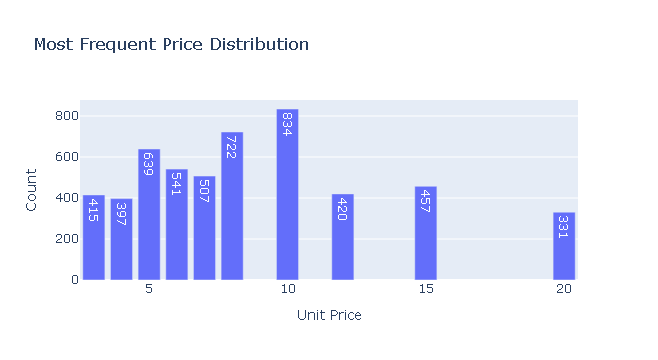

In [37]:
import plotly.express as px

# Create a DataFrame with counts of unit prices
unit_price_counts = df_package_not_null['unit price'].value_counts().reset_index()

# Rename the columns for clarity
unit_price_counts.columns = ['Unit Price', 'Count']

# Select the top 10 most frequent unit prices
top_prices = unit_price_counts.head(10)

# Create a bar chart to visualize the distribution of the most frequent unit prices
fig = px.bar(
    top_prices,
    x='Unit Price',
    y='Count',
    title='Most Frequent Price Distribution',
    text_auto=True
)

# Update the layout and traces for better visibility
fig.update_layout(yaxis_title="Count")
fig.update_traces(textposition='inside')

# Display the figure
fig.show()


# Load and Process the Generic Medicine Dataset

In [43]:
df_generic = pd.read_csv('generic.csv')

In [44]:
# Display the columns to understand the structure of the DataFrame
print("Original Columns:", df_generic.columns)

Original Columns: Index(['generic id', 'generic name', 'slug', 'monograph link', 'drug class',
       'indication', 'indication description', 'therapeutic class description',
       'pharmacology description', 'dosage description',
       'administration description', 'interaction description',
       'contraindications description', 'side effects description',
       'pregnancy and lactation description', 'precautions description',
       'pediatric usage description', 'overdose effects description',
       'duration of treatment description', 'reconstitution description',
       'storage conditions description', 'descriptions count'],
      dtype='object')


In [45]:
# Dropping 'generic id' and 'slug' columns as they won't be needed for analysis
df_generic.drop(["generic id", "slug"], axis=1, inplace=True)


In [46]:
# Display the first few rows of the cleaned DataFrame
df_generic.head()

,generic name,monograph link,drug class,indication,indication description,therapeutic class description,pharmacology description,dosage description,administration description,interaction description,contraindications description,side effects description,pregnancy and lactation description,precautions description,pediatric usage description,overdose effects description,duration of treatment description,reconstitution description,storage conditions description,descriptions count
0,Adalimumab,https://medex.com.bd/attachments/FgGWUFrlD7LThDOJE9ArMGq...,Immunosuppressant,Ulcerative colitis,"<div class=""ac-body""><div class=""min-str-block""><div cla...","<div class=""ac-body"">Disease-modifying antirheumatic dru...","<div class=""ac-body"">Adalimumab is a recombinant human I...","<div class=""ac-body""><strong>Rheumatoid Arthritis, Psori...","<div class=""ac-body"">Administered by subcutaneous inject...","<div class=""ac-body"">Abatacept: Increased risk of seriou...","<div class=""ac-body"">Adalimumab should not be administer...","<div class=""ac-body"">The most common adverse reaction wi...","<div class=""ac-body"">Pregnancy Category B. Adequate and ...","<div class=""ac-body""><ul>\r\n<li><strong>Serious infecti...","<div class=""ac-body""><strong>Pediatric Use</strong>: Saf...","<div class=""ac-body"">The maximum tolerated dose of Adali...",NaN,NaN,"<div class=""ac-body"">Do not use beyond the expiration da...",13
1,Acyclovir + Hydrocortisone,https://medex.com.bd/attachments/hmi4dt8aYaBubgZ8AkKxlsm...,Hydrocortisone & Combined preparations,Herpes labialis,"<div class=""ac-body"">Acyclovir &amp; Hydrocortisone Crea...","<div class=""ac-body"">Hydrocortisone &amp; Combined prepa...","<div class=""ac-body"">Acyclovir is a synthetic purine nuc...","<div class=""ac-body"">The cream should be topically appli...",NaN,NaN,"<div class=""ac-body"">There is no known contraindication....","<div class=""ac-body"">The following most common adverse r...","<div class=""ac-body"">Pregnancy Category B. There are no ...","<div class=""ac-body"">Acyclovir and Hydrocortisone should...","<div class=""ac-body"">Safety and effectiveness in pediatr...",NaN,NaN,NaN,"<div class=""ac-body"">Keep below 30°C temperature, away f...",10
2,Acyclovir (Topical),https://medex.com.bd/attachments/ENyoYKzQq8b7VMZE4lELf5n...,Topical Antiviral preparations,Sore lips,"<div class=""ac-body"">Acyclovir cream is a herpes simplex...","<div class=""ac-body"">Topical Antiviral preparations</div>","<div class=""ac-body"">Acyclovir is an antiviral drug acti...","<div class=""ac-body"">Acyclovir cream should be applied f...",NaN,"<div class=""ac-body"">Clinical experience has identified ...","<div class=""ac-body"">Acyclovir cream is contraindicated ...","<div class=""ac-body"">The most common adverse reactions a...","<div class=""ac-body"">Pregnancy Category B. There are no ...","<div class=""ac-body"">Acyclovir cream should only be appl...","<div class=""ac-body""><strong>Pediatric Use</strong>: An ...",NaN,NaN,NaN,"<div class=""ac-body"">Store Acyclovir cream at room tempe...",11
3,Acyclovir (Oral),https://medex.com.bd/attachments/zVc7h4TgucYev3wdbHFLiqL...,Herpes simplex & Varicella-zoster virus infections,Varicella zoster (chickenpox),"<div class=""ac-body"">Aciclovir is indicated for-<br>\r\n...","<div class=""ac-body"">Herpes simplex &amp; Varicella-zost...","<div class=""ac-body"">Aciclovir is a synthetic purine der...","<div class=""ac-body"">Treatment of initial herpes simplex...",NaN,"<div class=""ac-body"">Probenecid reduces Aciclovir excret...","<div class=""ac-body"">Aciclovir is contraindicated in pat...","<div class=""ac-body"">Rash, gastrointestinal disturbance,...","<div class=""ac-body"">Pregnancy category B. Aciclovir sho...","<div class=""ac-body"">Aciclovir should be administered wi...",NaN,NaN,NaN,NaN,"<div class=""ac-body"">Should be stored below 25°C. It sho...",10
4,Acyclovir (Ophthalmic),https://medex.com.bd/attachments/Kz5fDjxpm2VFnag8dQCT5Zh...,Opht

# Observation
Columns with description (indication description, dosage description .... storage conditions description) are written in HTML

We can parse those HTML files and convert them to text using BeautifulSoup package


In [49]:
# Clean the "indication description" column
df_generic["indication description"] = df_generic["indication description"].apply(
    lambda x: BeautifulSoup(x, "html.parser").get_text(separator=' ').replace('\n', ' ')
)

# Display the cleaned "indication description" to verify the changes
print(df_generic["indication description"].head())

0    Adalimumab is a tumor necrosis factor (TNF) blocker indi...
1    Acyclovir & Hydrocortisone Cream is indicated for the ea...
2    Acyclovir cream is a herpes simplex virus (HSV) nucleosi...
3    Aciclovir is indicated for-     The treatment of viral i...
4    Acyclovir is indicated for the treatment of Herpes simpl...
Name: indication description, dtype: object


In [51]:
def wc_desc(col_name):
    # Preprocess the text data by removing punctuation and converting to lowercase
    processed_data = df_generic_desc[col_name].map(lambda x: re.sub(r'[,.!?]', '', x).lower())
    
    # Combine all text into a single string for word cloud generation
    txt_data = ','.join(processed_data)

    # Generate the word cloud
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        max_font_size=300,
        stopwords=STOPWORDS,
        max_words=5000
    ).generate(txt_data)

    # Display the word cloud
    plt.figure(figsize=(20, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')  # Turn off the axis
    plt.show()

    # Save the word cloud image to a file
    wc.to_file("storage_conditions_word_cloud.png")


# Manufacturer

In [54]:
# Load the () data
df_manf = pd.read_csv('manufacturer.csv')

In [55]:
# Drop unnecessary columns
df_manf.drop(["manufacturer id", "slug"], axis=1, inplace=True)

In [56]:
# Display the first few rows of the DataFrame
print(df_manf.head())

                manufacturer name  generics count  brand names count
0                     ACI Limited           352.0              687.0
1          ACME Laboratories Ltd.           410.0              696.0
2     Ad-din Pharmaceuticals Ltd.            70.0              104.0
3      Aexim Pharmaceuticals Ltd.            34.0               43.0
4  Al-Madina Pharmaceuticals Ltd.            49.0               76.0


In [58]:
# Display the count of pharmaceutical companies
printmd(f"There are **{df_manf.shape[0]}** Pharmaceutical Companies")

There are **240** Pharmaceutical Companies

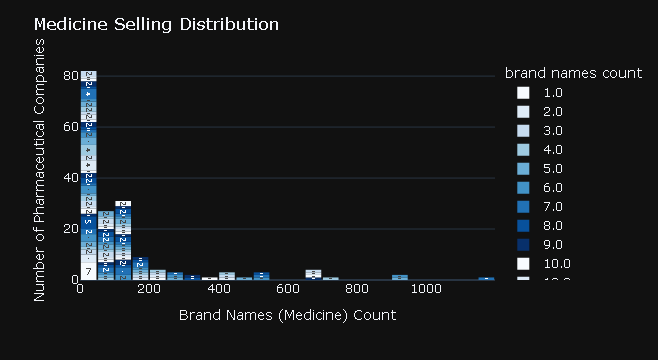

In [62]:
import plotly.express as px

# Create a histogram for the brand names count
fig = px.histogram(
    df_manf, 
    x="brand names count", 
    text_auto=True,  # Automatically displays the count on top of the bars
    color="brand names count",  # Customize color based on brand names count
    category_orders={"brand names count": sorted(df_manf["brand names count"].unique())},  # Ensures the bars are sorted
    color_discrete_sequence=px.colors.sequential.Blues  # Change to your preferred discrete color scale
)

# Update layout settings
fig.update_layout(
    title_text='Medicine Selling Distribution',  # Title of the plot
    xaxis_title_text='Brand Names (Medicine) Count',  # Label for x-axis
    yaxis_title_text='Number of Pharmaceutical Companies',  # Label for y-axis
    bargap=0.05,  # Gap between bars of adjacent location coordinates
    bargroupgap=0.05,  # Gap between bars of the same location coordinates
    template='plotly_dark'  # Applying a dark theme for better readability
)

# Adding data labels inside the bars
fig.update_traces(texttemplate='%{y}', textposition='inside')  # Show only the count

# Show the figure
fig.show()


# Observation
Most of the pharmaceutical companies sell less than 100 different types of brand names

Don't confuse medicine with brand names, different companies sell same generic medicine under different names. Example - Paracetamol generic is sold as Napa by Beximco Pharmaceuticals Ltd. and Ace by Square Pharmaceuticals Ltd.

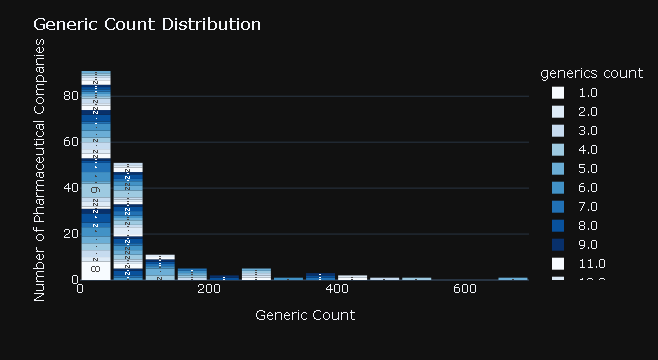

In [63]:
import plotly.express as px

# Create a histogram for the generic count
fig = px.histogram(
    df_manf, 
    x="generics count", 
    text_auto=True,  # Automatically displays the count on top of the bars
    color="generics count",  # Customize color based on generic count
    category_orders={"generics count": sorted(df_manf["generics count"].unique())},  # Sort bars based on generic counts
    color_discrete_sequence=px.colors.sequential.Blues  # Change to your preferred color scale
)

# Update layout settings
fig.update_layout(
    title_text='Generic Count Distribution',  # Title of the plot
    xaxis_title_text='Generic Count',  # Label for x-axis
    yaxis_title_text='Number of Pharmaceutical Companies',  # Label for y-axis
    bargap=0.05,  # Gap between bars of adjacent location coordinates
    bargroupgap=0.05,  # Gap between bars of the same location coordinates
    template='plotly_dark'  # Applying a dark theme for better readability
)

# Adding data labels inside the bars
fig.update_traces(texttemplate='%{y}', textposition='inside')  # Show only the count inside the bars

# Show the figure
fig.show()


In [64]:
# Get the pharmaceutical company with the highest brand names count
top_brand_company = df_manf.loc[df_manf['brand names count'].idxmax()]

# Display the result
print(top_brand_company)


manufacturer name    Incepta Pharmaceuticals Ltd.
generics count                              689.0
brand names count                          1188.0
Name: 69, dtype: object


In [65]:
df_manf.loc[df_manf['generics count'].idxmax()]

manufacturer name    Incepta Pharmaceuticals Ltd.
generics count                              689.0
brand names count                          1188.0
Name: 69, dtype: object

Incepta Pharmaceuticals Ltd. is the top seller in terms of generic as well as medicines/brand Names!!!

Most types of medicines are Tablet

# Dosage Form

In [76]:
df_dosage = pd.read_csv('dosage_form.csv')

In [77]:
# Display the column names
print("Columns in the DataFrame:", df_dosage.columns)

Columns in the DataFrame: Index(['dosage form id', 'dosage form name', 'slug', 'brand names count'], dtype='object')


In [78]:
# Drop unnecessary columns
df_dosage.drop(["dosage form id", "slug"], axis=1, inplace=True)

# Display the first few rows of the DataFrame
print(df_dosage.head())

               dosage form name  brand names count
0   Capsule (Sustained Release)                 65
1    Capsule (Modified Release)                 36
2    Capsule (Extended Release)                  9
3     Capsule (Delayed Release)                438
4  Capsule (Controlled Release)                  4


In [79]:
# Find the dosage form with the highest brand names count
top_dosage_company = df_dosage.loc[df_dosage['brand names count'].idxmax()]

# Display the result
print("Dosage form with the highest brand names count:")
print(top_dosage_company)

Dosage form with the highest brand names count:
dosage form name     Tablet
brand names count      9368
Name: 37, dtype: object


# Drug Class

In [80]:
# Load the drug class data
df_drug_class = pd.read_csv('drug_class.csv')

# Display the column names
print("Columns in the DataFrame:", df_drug_class.columns)


Columns in the DataFrame: Index(['drug class id', 'drug class name', 'slug', 'generics count'], dtype='object')


In [81]:
# Drop unnecessary columns
df_drug_class.drop(["drug class id", "slug"], axis=1, inplace=True)

# Display the first few rows of the DataFrame
print(df_drug_class.head())

                    drug class name  generics count
0                       Anaphylaxis               1
1          Intracellular antibiotic               1
2                      Glycopeptide               1
3  Fourth generation Cephalosporins               2
4   First generation Cephalosporins               4


In [82]:
# Find the drug class with the highest generics count
top_drug_class = df_drug_class.loc[df_drug_class['generics count'].idxmax()]

# Display the result
print("Drug class with the highest generics count:")
print(top_drug_class)

Drug class with the highest generics count:
drug class name    Herbal and Nutraceuticals
generics count                           153
Name: 38, dtype: object


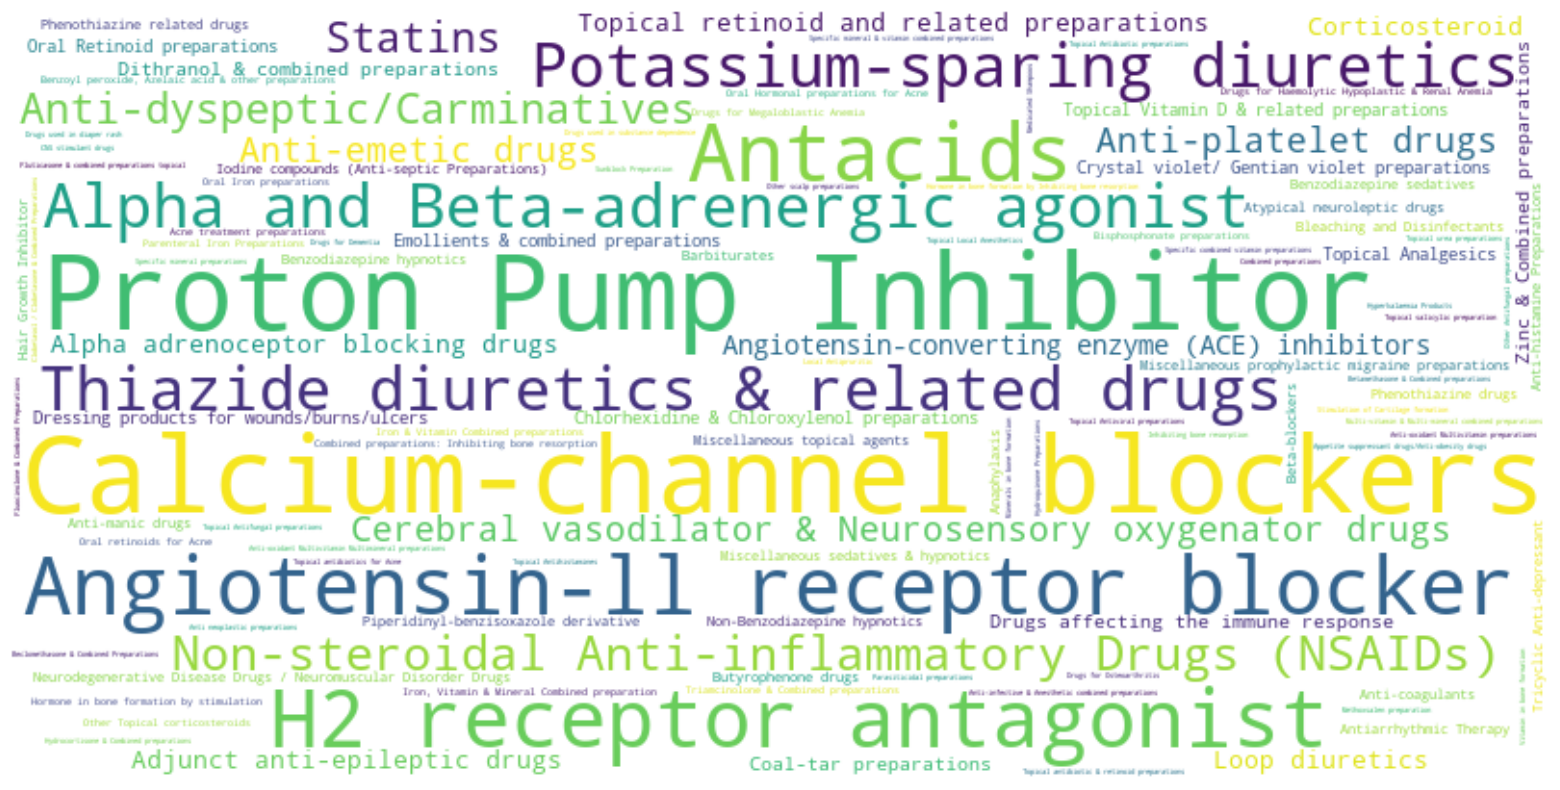

### These are the Most Frequent Drug Classes

In [83]:
# Count the occurrences of each drug class
data = df_drug_class['drug class name'].value_counts().to_dict()

# Generate the word cloud from the frequencies
wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_font_size=300
).generate_from_frequencies(data)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')  # Hide the axes
plt.show()

# Save the word cloud image
wc.to_file("drug_class_word_cloud.png")

# Display a markdown header
printmd("### These are the Most Frequent Drug Classes")


# Indication

In [84]:
# Load the indication dataset
df_indication = pd.read_csv('indication.csv')

# Display the columns to understand the structure of the DataFrame
print("Columns in the dataset:", df_indication.columns)

Columns in the dataset: Index(['indication id', 'indication name', 'slug', 'generics count'], dtype='object')


In [85]:
# Drop unnecessary columns
df_indication.drop(["indication id", "slug"], axis=1, inplace=True)

# Display the first few rows of the DataFrame
print(df_indication.head())

                             indication name  generics count
0                               Acrocyanosis               1
1  Acquired immunodeficiency syndrome (AIDS)              10
2                              Acne vulgaris              37
3                               Acne rosacea               0
4                                   Acidosis               2


In [86]:
# Get the row with the maximum 'generics count'
max_generics_row = df_indication.loc[df_indication['generics count'].idxmax()]
print("Row with maximum generics count:\n", max_generics_row)

Row with maximum generics count:
 indication name    Hypertension
generics count               65
Name: 879, dtype: object


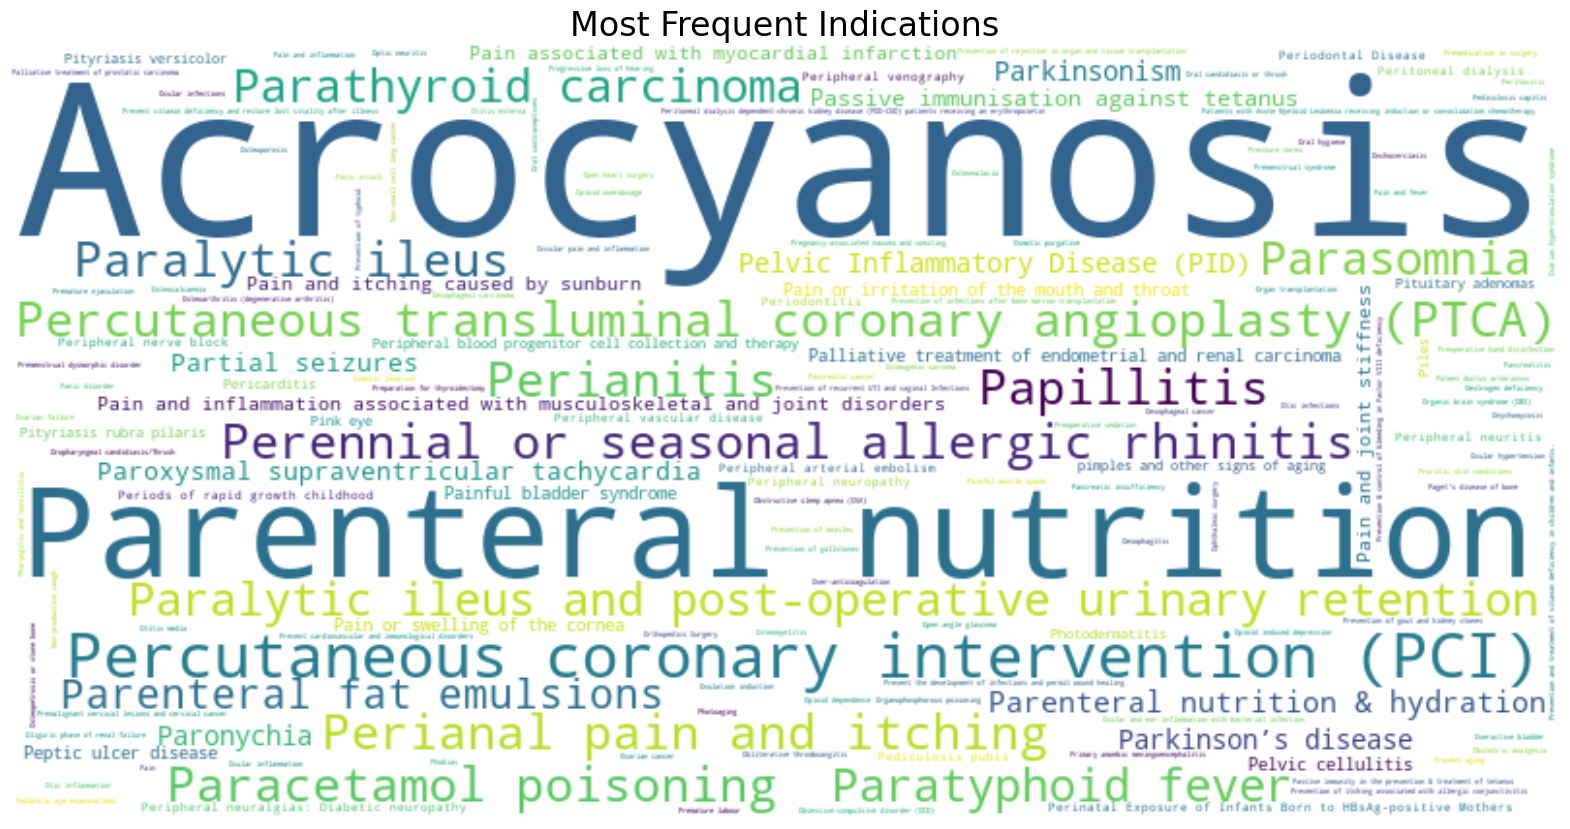

### These are the Most Frequent Indications

In [87]:
# Count the frequency of indication names
data = df_indication['indication name'].value_counts().to_dict()

# Generate a word cloud from the frequencies
wc = WordCloud(width=800, height=400, background_color="white", max_font_size=300).generate_from_frequencies(data)

# Plot the word cloud
plt.figure(figsize=(20, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')  # Hide axis
plt.title("Most Frequent Indications", fontsize=24)  # Optional title for clarity
plt.show()

# Save the word cloud image
wc.to_file("indication_name_word_cloud.png")

# Markdown for output
printmd("### These are the Most Frequent Indications")

# Conclusion
This notebook provides a comprehensive overview of the medicinal landscape in Bangladesh. However, there is significant potential for further exploration and enhancement.

Future Work
Price Extraction: Retrieve pricing information for all available medicine entries.
Pack Details: Collect data on pack sizes and containers for all relevant medicines.
Generic Descriptions: Conduct a deeper analysis of generic descriptions.
Indications and Drug Classes: Perform additional analysis on indications and drug classes.
Data Validation: Validate the count features in the Indication, Drug Class, Dosage Form, and Manufacturer datasets by cross-referencing them with the corresponding entries in the Medicine and Generic datasets.